# EDA for NYC taxi trip duration dataset

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('nyc_taxi_trip_duration.csv')
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
data.shape

(729322, 11)

In [5]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

## Exploratory Data Analysis

In [6]:
#Checking the Null values

data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

* As there are **no** null values available, proceeding with preprocessing of data.
* Changing the data types after under standing the dataset.
* **vedor_id** and **store_and_fwd_flag** can be converted into category variables.

In [7]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')

data.dtypes[data.dtypes=='category']

store_and_fwd_flag    category
dtype: object

### `DateTime data type`
* Converting both **pickup_datetime** and **dropoff_datetime** datatypes to make insight from data.

In [9]:
pickup_date = pd.DatetimeIndex(data['pickup_datetime'])
dropoff_date = pd.DatetimeIndex(data['dropoff_datetime'])

In [10]:
#creating new variables from date data types

data['pickup_hour'] = pickup_date.hour
data['pickup_month'] = pickup_date.month
data['dropoff_hour'] = dropoff_date.hour
data['dropoff_month'] = dropoff_date.month
data['pickup_day_of_week'] = pickup_date.day_of_week
data['dropoff_day_of_week'] = dropoff_date.day_of_week

In [11]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_month,dropoff_hour,dropoff_month,pickup_day_of_week,dropoff_day_of_week
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,16,2,16,2,0,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,23,3,23,3,4,4
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,17,2,18,2,6,6
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,9,1,10,1,1,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,6,2,6,2,2,2


* **id, pickup_datetime** and **dropoff_datetime** can be dropped from the dataset as required variables are derived from it.

In [12]:
data.drop(['id','pickup_datetime','dropoff_datetime'],axis=1,inplace=True)
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_month,dropoff_hour,dropoff_month,pickup_day_of_week,dropoff_day_of_week
0,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,16,2,16,2,0,0
1,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,23,3,23,3,4,4
2,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,17,2,18,2,6,6
3,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,9,1,10,1,1,1
4,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,6,2,6,2,2,2


* Bifuricating the day into 4 categories to check which has been the busiest.

In [14]:
# 1:Morning, 2:Afternoon, 3:Evening, 4:Latenight

hour_list = []
for x in data['pickup_hour']:
  if x<=6:
    hour_list.append(1)
  elif (x==7) or (x<=12):
    hour_list.append(2)
  elif (x==13) or (x<=18):
    hour_list.append(3)
  else:
    hour_list.append(4)

In [15]:
data['shift'] = hour_list
data[['shift','pickup_hour']].tail()

,shift,pickup_hour
729317,3,13
729318,1,0
729319,3,18
729320,2,9
729321,3,17


**Calculating the distance between pickup point and dropoff point using `haversine formulae`.

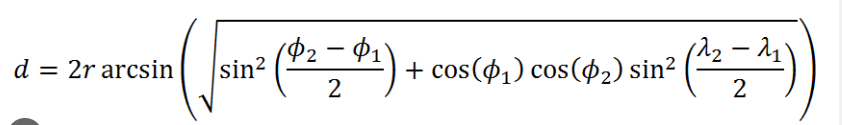

In [16]:
# custom function to find distance

def distance(lon1, lat1, lon2, lat2):

  #mean radius of earth
  rad = 6371

  #haversine formulae
  dlat = (lat2-lat1)
  dlon = (lon2-lon1)

  a = (pow(math.sin(dlat/2),2)+(pow(math.sin(dlon/2),2)*math.cos(lat1)*math.cos(lat2)))
  c = 2 * (math.sqrt(a))

  return rad*c

In [17]:
dist_list = []

for i in data.index:
  lat1 = data['pickup_latitude'][i]
  lon1 = data['pickup_longitude'][i]
  lat2 = data['dropoff_latitude'][i]
  lon2 = data['dropoff_longitude'][i]

  dis_list = dist_list.append(distance(lat1,lon1,lat2,lon2))

In [18]:
data['distance_KM'] = dist_list
data['distance_KM'].head()

0     63.757195
1     56.127038
2    317.703116
3     35.736319
4    187.764331
Name: distance_KM, dtype: float64

* Since we found the distance using the latitude and longitude points we can now drop them for the ease of computation.

In [19]:
data.drop(['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'],axis=1,inplace=True)
data.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_hour,pickup_month,dropoff_hour,dropoff_month,pickup_day_of_week,dropoff_day_of_week,shift,distance_KM
0,2,1,N,400,16,2,16,2,0,0,3,63.757195
1,1,2,N,1100,23,3,23,3,4,4,4,56.127038
2,2,2,N,1635,17,2,18,2,6,6,3,317.703116
3,2,6,N,1141,9,1,10,1,1,1,2,35.736319
4,1,1,N,848,6,2,6,2,2,2,1,187.764331


## Checking for outliers

Text(0.5, 1.0, 'mean:158.272,median:82.9198280245314')

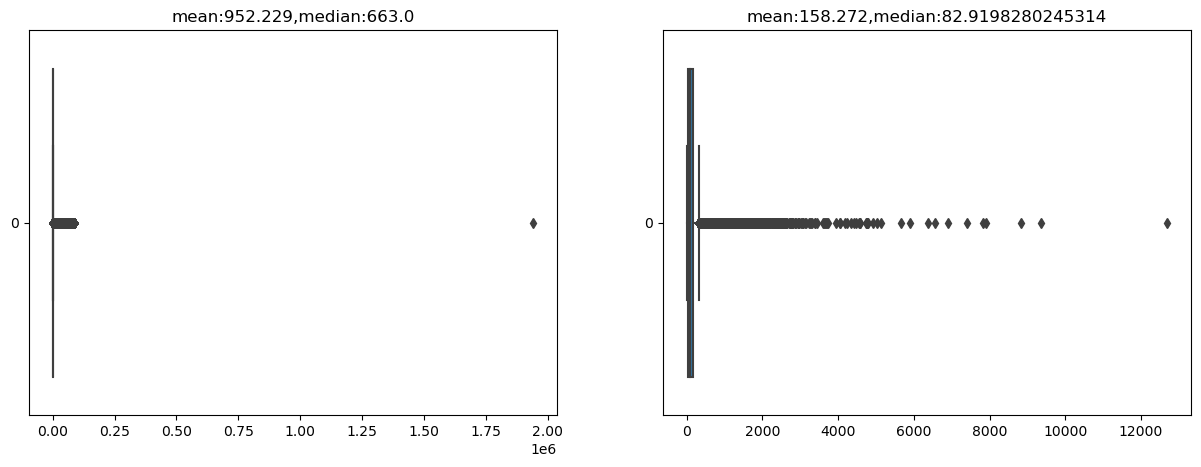

In [20]:
#using boxplot to check outliers

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data['trip_duration'],orient='h')
plt.title('mean:{},median:{}'.format(round(data['trip_duration'].mean(),3),data['trip_duration'].median()))

plt.subplot(1,2,2)
sns.boxplot(data['distance_KM'],orient='h')
plt.title('mean:{},median:{}'.format(round(data['distance_KM'].mean(),3),data['distance_KM'].median()))

* From the above visualization it is evident that there are a lot of outliers present in the dataset.

## Handling the Outliers

* To remove outliers there are various methods, I am trying in 2 ways and will choose whichever performs better.

### `Method 1: Using IQR(Inter Quartile Range)`

In [21]:
#Copying the original dataset before applying methods
temp_data = data.copy()

In [22]:
#function to remove outliers using IQR

def outlier_remover(variable):

  #finding Q1 and Q3
  Q1 = np.quantile(temp_data[variable],.25)
  Q3 = np.quantile(temp_data[variable],.75)

  #IQR
  IQR = Q3 - Q1

  #lower and higher whisker
  L = Q1 - 1.5*IQR
  H = Q3 + 1.5*IQR

  #removing the outlier and replacing it with NaN value
  temp_data[variable] = np.where((temp_data[variable]<L) | (temp_data[variable]>H), np.NaN, temp_data[variable])

In [23]:
outlier_remover('distance_KM')
outlier_remover('trip_duration')
temp_data.isnull().sum()

vendor_id                  0
passenger_count            0
store_and_fwd_flag         0
trip_duration          36963
pickup_hour                0
pickup_month               0
dropoff_hour               0
dropoff_month              0
pickup_day_of_week         0
dropoff_day_of_week        0
shift                      0
distance_KM            70961
dtype: int64

* Performing **Random Sample Imputation** on null values to get more accurate distribution than replacing them with median.

In [24]:
#Replacing the NaN value with random values from dataset to get closer to gaussian distribution.

def impute_nan(df,variable):
  random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  random_sample.index = df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable] = random_sample

In [25]:
impute_nan(temp_data,'distance_KM')
impute_nan(temp_data,'trip_duration')

Text(0.5, 1.0, 'mean:91.901,median:73.88752339576284')

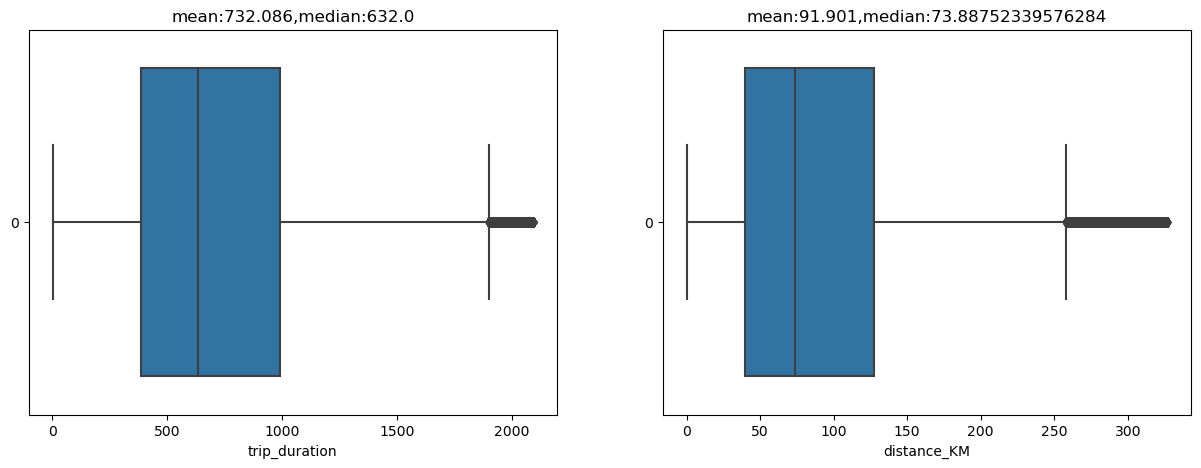

In [26]:
#using boxplot to check outliers for temp_data

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(temp_data['trip_duration'],orient='h')
plt.xlabel('trip_duration')
plt.title('mean:{},median:{}'.format(round(temp_data['trip_duration'].mean(),3),temp_data['trip_duration'].median()))

plt.subplot(1,2,2)
sns.boxplot(temp_data['distance_KM'],orient='h')
plt.xlabel('distance_KM')
plt.title('mean:{},median:{}'.format(round(temp_data['distance_KM'].mean(),3),temp_data['distance_KM'].median()))

* There are still some outliers left in the dataset but now boxplot looks better.

### `Method 2: Using Z-score`
* Calculating z-score and replacing the values more than threshold, with random sample imputation.

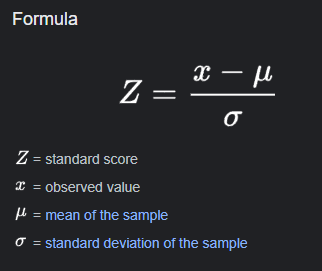

In [28]:
#copying dataset to new df to compare which performs better
zscore_temp_data = data.copy()

In [29]:
#Function to remove outliers using Z-score

def zscore_outlier(variable):

  #threshold i.e 3 standard deviations from mean
  thres = 3

  mean = zscore_temp_data[variable].mean()
  std = zscore_temp_data[variable].std()

  #calculting Z_score
  z_score = (zscore_temp_data[variable] - mean)/std

  #removing the outlier and replacing it with NaN value
  zscore_temp_data[variable] = np.where(abs(z_score)>thres, np.NaN, zscore_temp_data[variable])

In [30]:
zscore_outlier('distance_KM')
zscore_outlier('trip_duration')
zscore_temp_data.isnull().sum()

vendor_id                  0
passenger_count            0
store_and_fwd_flag         0
trip_duration           1020
pickup_hour                0
pickup_month               0
dropoff_hour               0
dropoff_month              0
pickup_day_of_week         0
dropoff_day_of_week        0
shift                      0
distance_KM            22627
dtype: int64

In [31]:
#Replacing the NaN value with random values from dataset to get closer gaussian distribution.

def impute_nan(df,variable):
  random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  random_sample.index = df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable] = random_sample

In [32]:
impute_nan(zscore_temp_data,'distance_KM')
impute_nan(zscore_temp_data,'trip_duration')

Text(0.5, 1.0, 'mean:124.557,median:79.91169859766903')

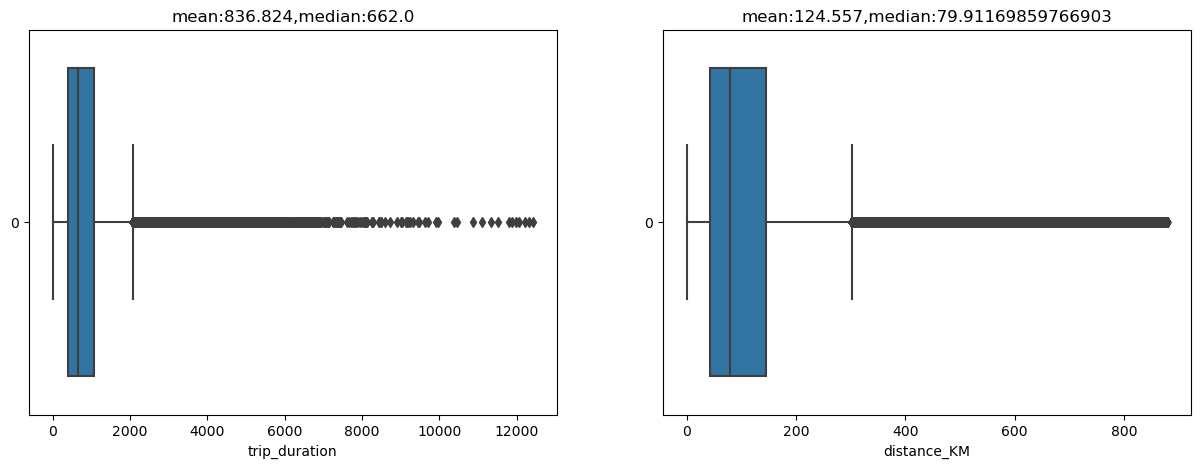

In [33]:
#using boxplot to check outliers for temp_data

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(zscore_temp_data['trip_duration'],orient='h')
plt.xlabel('trip_duration')
plt.title('mean:{},median:{}'.format(round(zscore_temp_data['trip_duration'].mean(),3),zscore_temp_data['trip_duration'].median()))

plt.subplot(1,2,2)
sns.boxplot(zscore_temp_data['distance_KM'],orient='h')
plt.xlabel('distance_KM')
plt.title('mean:{},median:{}'.format(round(zscore_temp_data['distance_KM'].mean(),3),zscore_temp_data['distance_KM'].median()))

* It is clearly evident **IQR method** performs way better than **Z-score** to remove outliers for this dataset.
* so for future analysis in this workbook we are using **temp_data** only.
* Now that the data is clean, it is ready for EDA.

## Univariate Analysis

In [34]:
temp_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_hour,pickup_month,dropoff_hour,dropoff_month,pickup_day_of_week,dropoff_day_of_week,shift,distance_KM
0,2,1,N,400.0,16,2,16,2,0,0,3,63.757195
1,1,2,N,1100.0,23,3,23,3,4,4,4,56.127038
2,2,2,N,1635.0,17,2,18,2,6,6,3,317.703116
3,2,6,N,1141.0,9,1,10,1,1,1,2,35.736319
4,1,1,N,848.0,6,2,6,2,2,2,1,187.764331


In [35]:
temp_data.isnull().sum()

vendor_id              0
passenger_count        0
store_and_fwd_flag     0
trip_duration          0
pickup_hour            0
pickup_month           0
dropoff_hour           0
dropoff_month          0
pickup_day_of_week     0
dropoff_day_of_week    0
shift                  0
distance_KM            0
dtype: int64

Text(0, 0.5, 'num_of_trips')

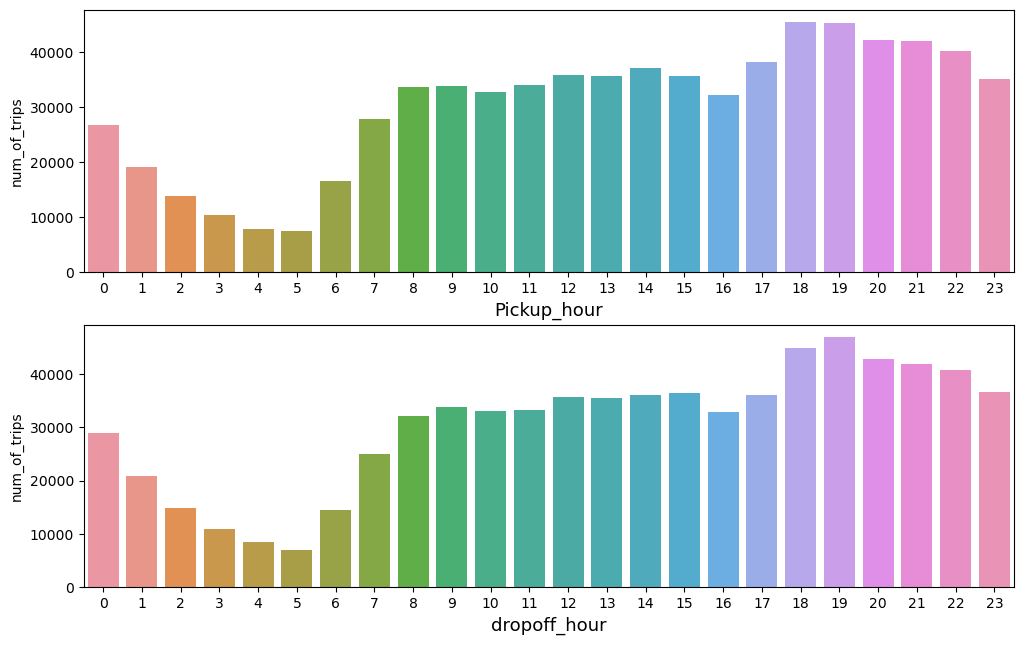

In [36]:
plt.figure(figsize=(12,7.5))

plt.subplot(2,1,1)
sns.countplot(data=temp_data,x='pickup_hour')
plt.xlabel('Pickup_hour',fontsize=13)
plt.ylabel('num_of_trips',fontsize=10)

plt.subplot(2,1,2)
sns.countplot(x=temp_data['dropoff_hour'])
plt.xlabel('dropoff_hour',fontsize=13)
plt.ylabel('num_of_trips',fontsize=10)

* This suggests that more num of trips took place between **18th and 19th** hour of the for **pickup_hour**.
* For **dropoff_hour** the **19th** hour has been the highest because higher num of trips started in 18th and completed in 19th.

Text(0, 0.5, 'num_of_trips')

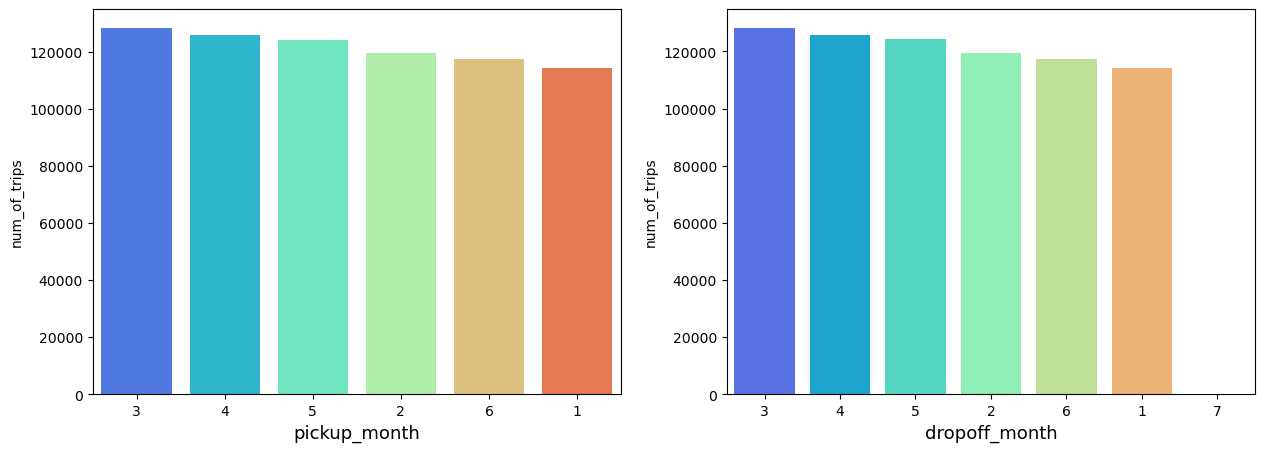

In [37]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x=temp_data['pickup_month'],order=temp_data['pickup_month'].value_counts().index,palette='rainbow')
plt.xlabel('pickup_month',fontsize=13)
plt.ylabel('num_of_trips')

plt.subplot(1,2,2)
sns.countplot(x=temp_data['dropoff_month'],order=temp_data['dropoff_month'].value_counts().index,palette='rainbow')
plt.xlabel('dropoff_month',fontsize=13)
plt.ylabel('num_of_trips')

* Overall **march** has been the busiest month of all.
* Some trips started on june30th and ended next month, so we got an extra bin in dropoff_month which has very less num of trips evidently.

Text(0, 0.5, 'num_of_trips')

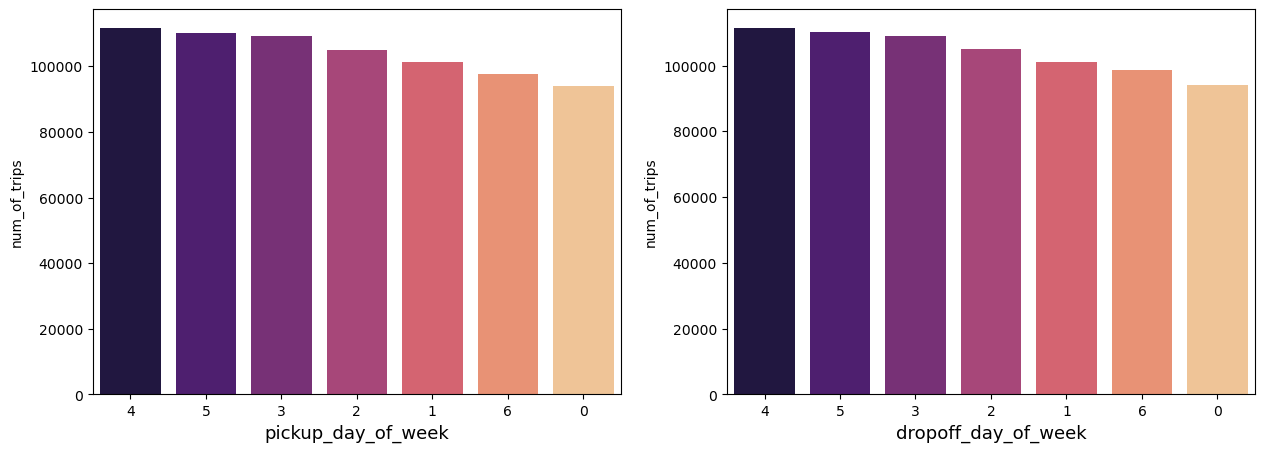

In [39]:
# 0:Monday, 1:Tuesday, 2:Wednesday, 3:Thursday, 4:Friday, 5:Saturday, 6:Sunday

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x=temp_data['pickup_day_of_week'],order=temp_data['pickup_day_of_week'].value_counts().index,palette='magma')
plt.xlabel('pickup_day_of_week',fontsize=13)
plt.ylabel('num_of_trips')

plt.subplot(1,2,2)
sns.countplot(x=temp_data['dropoff_day_of_week'],order=temp_data['dropoff_day_of_week'].value_counts().index,palette='magma')
plt.xlabel('dropoff_day_of_week',fontsize=13)
plt.ylabel('num_of_trips')

* Clearly **Friday** has been the busiest for both the graphs.
* Can be beacuse of the weekend or any other reason.
* There is no major difference between distibution of trips for pickup and dropoff.

Text(0, 0.5, 'num_of_trips')

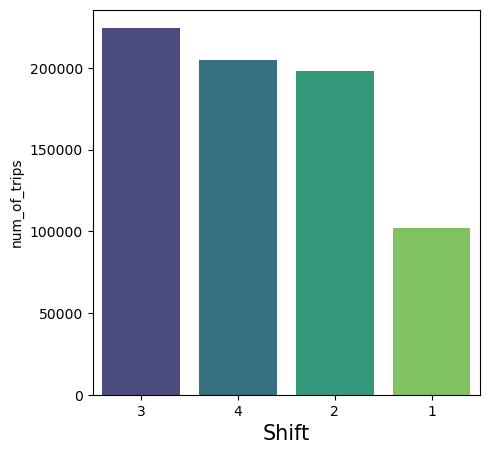

In [40]:
plt.figure(figsize=(5,5))
sns.countplot(x=temp_data['shift'],order=temp_data['shift'].value_counts().index,palette='viridis')
plt.xlabel('Shift',fontsize=15)
plt.ylabel('num_of_trips')

* So **Evening** i.e from **6pm to 12am** has been the busiest among all.
* The reason can be those hours are after work hours for most people.

Text(0.5, 1.0, 'skewness=1.105, Kurtosis=0.749')

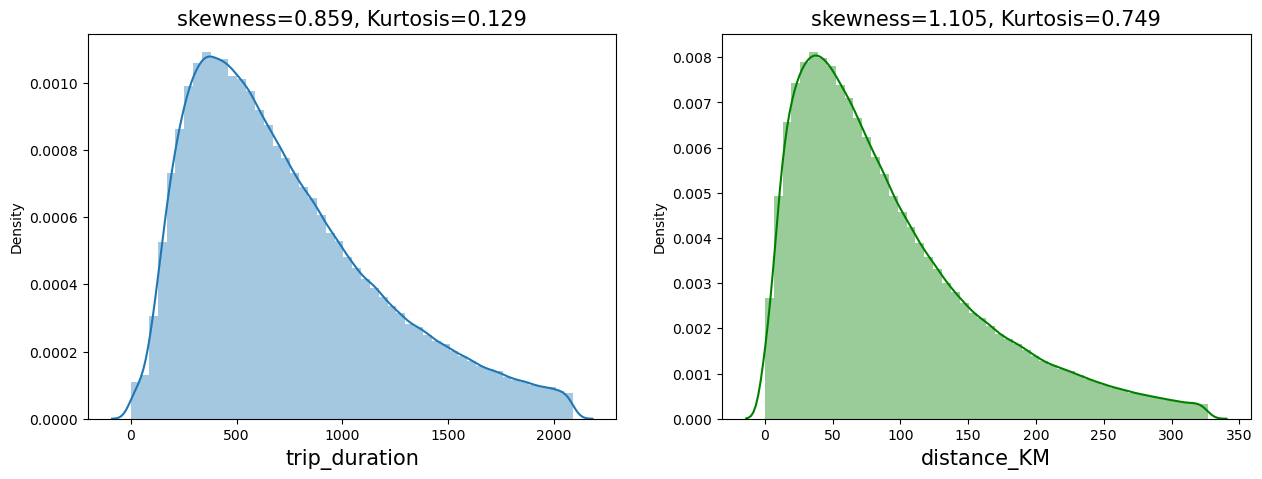

In [41]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(temp_data['trip_duration'])
skew=temp_data['trip_duration'].skew()
kurt=temp_data['trip_duration'].kurt()
plt.xlabel('trip_duration',fontsize=15)
plt.ylabel('Density')
plt.title('skewness={}, Kurtosis={}'.format(round(skew,3),round(kurt,3)),fontsize=15)

plt.subplot(1,2,2)
sns.distplot(temp_data['distance_KM'],color='g')
skew=temp_data['distance_KM'].skew()
kurt=temp_data['distance_KM'].kurt()
plt.xlabel('distance_KM',fontsize=15)
plt.ylabel('Density')
plt.title('skewness={}, Kurtosis={}'.format(round(skew,3),round(kurt,3)),fontsize=15)

* Both **trip_duration** and **distance_KM** skweness values are positive, so they are right skewed distribitions.
* Kurtosis is also greater than o, it suggests **Longer distance and Fat tail**.

## Bivariate and Multivariate analysis

In [42]:
corr_temp_data = temp_data.drop(columns='store_and_fwd_flag',axis=1)
corr_temp_data.head()

,vendor_id,passenger_count,trip_duration,pickup_hour,pickup_month,dropoff_hour,dropoff_month,pickup_day_of_week,dropoff_day_of_week,shift,distance_KM
0,2,1,400.0,16,2,16,2,0,0,3,63.757195
1,1,2,1100.0,23,3,23,3,4,4,4,56.127038
2,2,2,1635.0,17,2,18,2,6,6,3,317.703116
3,2,6,1141.0,9,1,10,1,1,1,2,35.736319
4,1,1,848.0,6,2,6,2,2,2,1,187.764331


In [43]:
correlation = corr_temp_data.corr()
correlation

,vendor_id,passenger_count,trip_duration,pickup_hour,pickup_month,dropoff_hour,dropoff_month,pickup_day_of_week,dropoff_day_of_week,shift,distance_KM
vendor_id,1.000000,0.286463,0.004756,0.009772,-0.005363,0.009702,-0.005336,0.000787,0.000900,0.009709,0.001266
passenger_count,0.286463,1.000000,0.010497,0.009851,-0.001481,0.009214,-0.001497,0.025758,0.025941,0.010680,0.001809
trip_duration,0.004756,0.010497,1.000000,0.026752,0.038262,0.022685,0.038367,-0.022382,-0.020994,0.024446,0.436039
pickup_hour,0.009772,0.009851,0.026752,1.000000,-0.003301,0.934591,-0.003043,-0.082079,-0.078777,0.960936,-0.016152
pickup_month,-0.005363,-0.001481,0.038262,-0.003301,1.000000,-0.004013,0.999937,-0.013626,-0.013320,-0.003196,0.010352
dropoff_hour,0.009702,0.009214,0.022685,0.934591,-0.004013,1.000000,-0.004386,-0.085767,-0.089876,0.903662,-0.021590
dropoff_month,-0.005336,-0.001497,0.038367,-0.003043,0.999937,-0.004386,1.000000,-0.013604,-0.013268,-0.002974,0.010424
pickup_day_of_week,0.000787,0.025758,-0.022382,-0.082079,-0.013626,-0.085767,-0.013604,1.000000,0.993789,-0.076723,0.019778
dropoff_day_of_week,0.000900,0.025941,-0.020994,-0.078777,-0.013320,-0.089876,-0.013268,0.993789,1.000000,-0.073876,0.020980
shift,0.009709,0.010680,0.024446,0.960936,-0.003196,0.903662,-0.002974,-0.076723,-0.073876,1.000000,-0.012067


<Axes: >

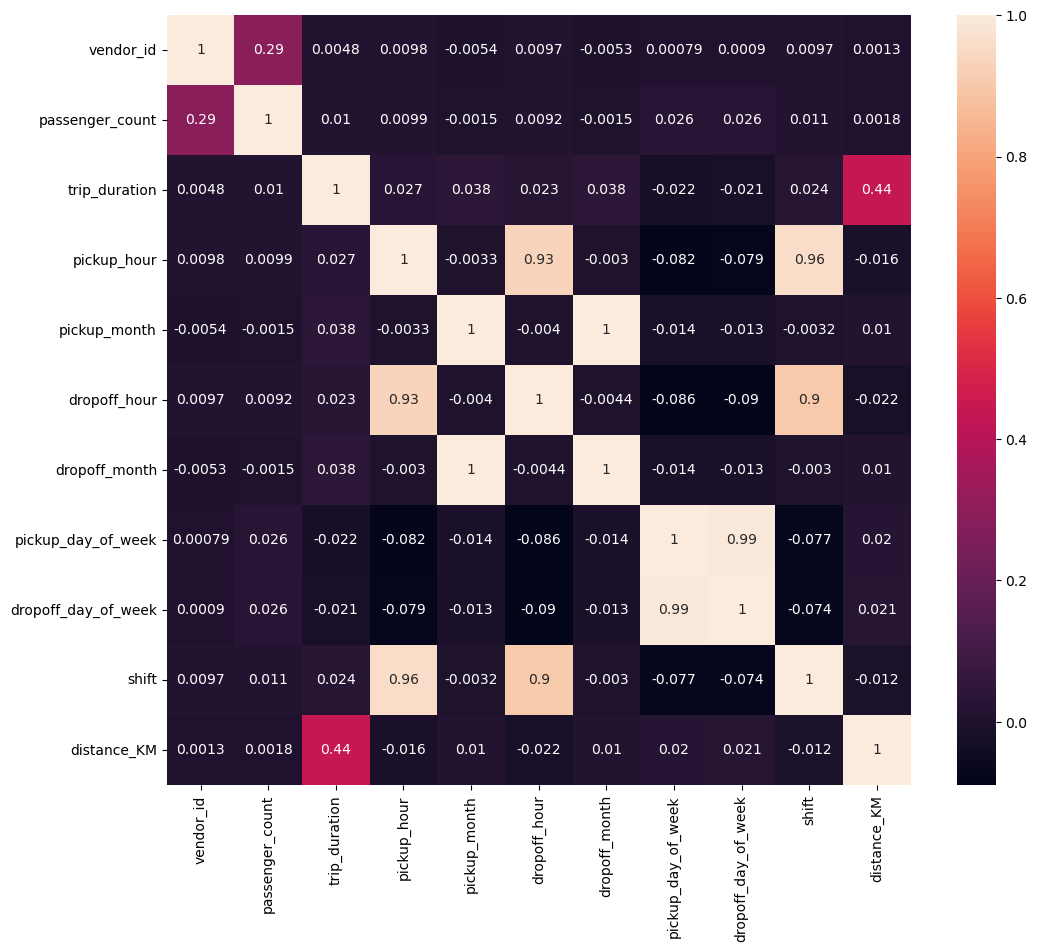

In [44]:
#plotting heatmap to understand the collinearity among variables

plt.figure(figsize=(12,10))
sns.heatmap(correlation,annot=True)

* **trip_duration** and **distance_KM** are moderately correlated.
* All varibles having correlation > 0.5 have literally sense to it too.
* Creating a **pairplot** will not give us any new insight and computationally expensive, so skipped it.

### Does pickup_day_of_week has an effect on trip_duration ?

pickup_day_of_week
0    66389379.0
6    66849613.0
1    75406495.0
5    78603385.0
2    79625251.0
3    83296627.0
4    83756003.0
Name: trip_duration, dtype: float64


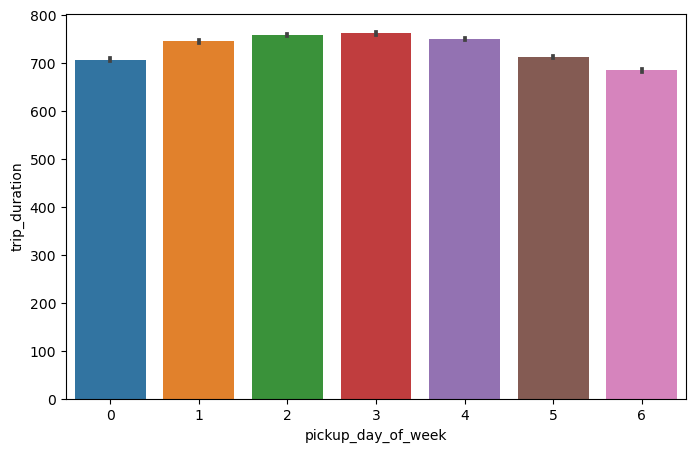

In [45]:
plt.figure(figsize=(8,5))

m = temp_data.groupby('pickup_day_of_week')['trip_duration'].sum().sort_values()
sns.barplot(x='pickup_day_of_week',y='trip_duration',data=temp_data)
print(m)

### Summary:
* The num of trips on **thursday** are higher than **friday**, but the total trip duration is high on friday as you can see by order.
* **saturday** has less no of trips compared to **tuesday** but the trip_duration is more for saturday.
* So these points can be looked up in further analysis.

### Does num of passengers affect the time taken for a trip?

In [46]:
k_data = temp_data[['passenger_count','trip_duration']]
kendall_correlation = k_data.corr(method='kendall')
kendall_correlation

,passenger_count,trip_duration
passenger_count,1.000000,0.015012
trip_duration,0.015012,1.000000


<Axes: >

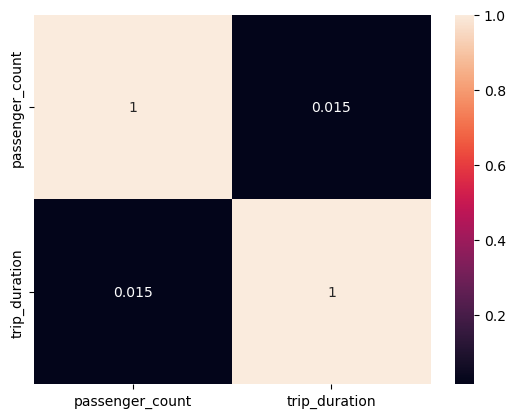

In [47]:
sns.heatmap(kendall_correlation,annot=True)

#### Summary:
* From the heatmap above the correaltion between these variables is low.
* Choose **kendal** because it works well in presence of outliers.
* So it is safe to avoid this question in futher analysis.

### Does store_and_fwd_flag hs an impact on trip_duration?

store_and_fwd_flag
Y    1613
N    2092
Name: trip_duration, dtype: int64


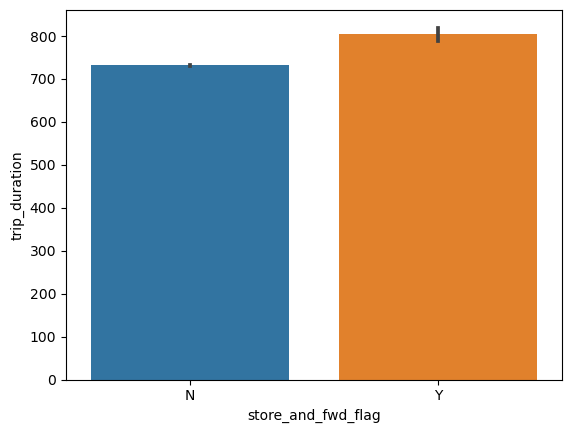

In [48]:
m = temp_data.groupby('store_and_fwd_flag')['trip_duration'].nunique().sort_values()
sns.barplot(x='store_and_fwd_flag',y='trip_duration',data=temp_data)
print(m)

### Summary:
* For **Y** i,e if the recorder is present, so the reading were accurate and num of trip was also more.
* Whereas for **N**, Since we cant measure accurate readings, the num of trips were less, even though num of cars not having the recorder are more.

**Now that we are done with EDA, and getting insights from the bivariate and multivriate analysis, we can now start preprocessing the data.**

## Data Preprocessing

In [49]:
#identifying the categorical variables
temp_data.dtypes

vendor_id                 int64
passenger_count           int64
store_and_fwd_flag     category
trip_duration           float64
pickup_hour               int32
pickup_month              int32
dropoff_hour              int32
dropoff_month             int32
pickup_day_of_week        int32
dropoff_day_of_week       int32
shift                     int64
distance_KM             float64
dtype: object

In [50]:
#performing one hot encoding on categorical variables

data_cleaned = pd.get_dummies(temp_data)
data_cleaned.head()

,vendor_id,passenger_count,trip_duration,pickup_hour,pickup_month,dropoff_hour,dropoff_month,pickup_day_of_week,dropoff_day_of_week,shift,distance_KM,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2,1,400.0,16,2,16,2,0,0,3,63.757195,True,False
1,1,2,1100.0,23,3,23,3,4,4,4,56.127038,True,False
2,2,2,1635.0,17,2,18,2,6,6,3,317.703116,True,False
3,2,6,1141.0,9,1,10,1,1,1,2,35.736319,True,False
4,1,1,848.0,6,2,6,2,2,2,1,187.764331,True,False


* **One Hot Encoding** beacuse the category variables have only 2 labels so this encoding will perform well.
* Now the dataset is ready for scaling.

## Conclusion:

1. The requirement is that to **predict the trip duration** depending on the various parameters present in the dataset.
2. So I have observed outliers using two methods and replaced them using **random sample imputation**.
3. From the variables available created new variables for the model to train easily like **distance_in_KM**.
4. Tried to find out what variables can be useful for further analysis using correlation and heatmaps.